In [7]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
conn = psycopg2.connect(
    dbname="telecom",
    user="sarah",
    password="sarah",
    host="localhost",
    port="5432"
)

In [3]:
query = "SELECT * FROM xdr_data;"
data = pd.read_sql_query(query, conn)
conn.close()

/tmp/ipykernel_13940/3373734684.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [5]:
excel_data = pd.read_excel("../data/Week2_challenge_data_source.xlsx")
excel_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [6]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [8]:
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [23]:
critical_cols = ['Bearer Id', 'MSISDN/Number', 'Total DL (Bytes)', 'Total UL (Bytes)']
for col in critical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

supplementary_cols = ['Avg RTT DL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)']
for col in supplementary_cols:
    data[col].fillna(data[col].median(), inplace=True)

categorical_cols = ['Handset Manufacturer', 'Handset Type', 'Last Location Name']
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

threshold = 0.5 * len(data)
data.dropna(thresh=threshold, axis=1, inplace=True)

/tmp/ipykernel_13940/1709902353.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipykernel_13940/1709902353.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [24]:
data.isnull().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                         0
IMEI                                572
Last Location Name                    0
Avg RTT DL (ms)                       0
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
TCP DL Retrans. Vol (Bytes)           0
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
HTTP DL (Bytes)                       0
Activity Duration DL (ms)             1


In [35]:
cols_with_small_missing = ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1']
for col in cols_with_small_missing:
    data[col].dropna(inplace=True)

data['IMSI'].fillna('Unknown', inplace=True)
data['IMEI'].fillna('Unknown', inplace=True)

cols_with_large_missing = ['Avg RTT UL (ms)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 
                           'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 
                           'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']
for col in cols_with_large_missing:
    data[col].fillna(data[col].median(), inplace=True)

/tmp/ipykernel_13940/1585671342.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IMSI'].fillna('Unknown', inplace=True)
/tmp/ipykernel_13940/1585671342.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['IMSI'].fillna('Unknown', inplace=True)
/tmp/ipykernel_13940/1585671342.py:6: FutureWarning: A value is trying to be set on a copy 

In [45]:
data.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
TCP DL Retrans. Vol (Bytes)       0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
HTTP DL (Bytes)                   0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer        

In [44]:
data.dropna(inplace=True)

In [49]:
top_10_handsets = data['Handset Type'].value_counts().head(10)
top_10_handsets

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [50]:
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
top_3_manufacturers

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [51]:
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets_per_manufacturer[manufacturer] = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"{manufacturer}:")
    print(handsets)

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [52]:
# Group by user and calculate metrics
user_behavior = data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                      # Number of xDR sessions
    'Dur. (ms)': 'sum',                        # Total session duration
    'Total DL (Bytes)': 'sum',                 # Total Download data
    'Total UL (Bytes)': 'sum',                 # Total Upload data
    'Social Media DL (Bytes)': 'sum',          # Social Media Download
    'Social Media UL (Bytes)': 'sum',          # Social Media Upload
    'Google DL (Bytes)': 'sum',                # Google Download
    'Google UL (Bytes)': 'sum',                # Google Upload
    'Email DL (Bytes)': 'sum',                 # Email Download
    'Email UL (Bytes)': 'sum',                 # Email Upload
    'Youtube DL (Bytes)': 'sum',               # YouTube Download
    'Youtube UL (Bytes)': 'sum',               # YouTube Upload
    'Netflix DL (Bytes)': 'sum',               # Netflix Download
    'Netflix UL (Bytes)': 'sum',               # Netflix Upload
    'Gaming DL (Bytes)': 'sum',                # Gaming Download
    'Gaming UL (Bytes)': 'sum',                # Gaming Upload,
}).reset_index()

# Add total data volume column
user_behavior['Total Volume (Bytes)'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']

print("Aggregated User Behavior:")
print(user_behavior.head())

Aggregated User Behavior:
   MSISDN/Number  Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0   3.360100e+10          1   116720.0      8.426375e+08        36053108.0   
1   3.360100e+10          1   181230.0      1.207552e+08        36104459.0   
2   3.360100e+10          1   134969.0      5.566597e+08        39306820.0   
3   3.360101e+10          1    49878.0      4.019932e+08        20327526.0   
4   3.360101e+10          2    37104.0      1.363130e+09        94280527.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                2206504.0                  25631.0          3337123.0   
1                2598548.0                  62017.0          4197697.0   
2                3148004.0                  47619.0          3343483.0   
3                 251469.0                  28825.0          5937765.0   
4                2861230.0                  51312.0         13728668.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Yo

In [53]:
# Segment users into deciles based on total duration
user_behavior['Duration Decile'] = pd.qcut(user_behavior['Dur. (ms)'], q=10, labels=False)

# Compute total data (DL + UL) per decile
decile_data = user_behavior.groupby('Duration Decile').agg({
    'Total Volume (Bytes)': 'sum',
    'Dur. (ms)': 'mean'
}).reset_index()

print("Decile Data:")
print(decile_data)

Decile Data:
   Duration Decile  Total Volume (Bytes)      Dur. (ms)
0                0          5.439277e+12   20072.819704
1                1          6.109410e+12   40229.016192
2                2          6.536402e+12   71145.599497
3                3          6.034241e+12   86368.788611
4                4          5.144182e+12   94271.087423
5                5          6.425801e+12  117432.523538
6                6          6.152478e+12  147783.117350
7                7          7.822234e+12  174939.103874
8                8          9.306258e+12  232732.436781
9                9          1.539441e+13  484625.140932


In [54]:
# Compute basic metrics for relevant columns
basic_metrics = user_behavior[['Dur. (ms)', 'Total Volume (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']].agg(['mean', 'median', 'std', 'min', 'max'])

print("Basic Metrics:")
print(basic_metrics)

Basic Metrics:
           Dur. (ms)  Total Volume (Bytes)  Total DL (Bytes)  Total UL (Bytes)
mean    1.468438e+05          6.959272e+08      6.382035e+08      5.772370e+07
median  1.027410e+05          6.179232e+08      5.703713e+08      4.679434e+07
std     2.892198e+05          1.695706e+09      1.558474e+09      1.400375e+08
min     7.142000e+03          3.324901e+07      8.827082e+06      2.866892e+06
max     7.244640e+07          5.312489e+11      4.869236e+11      4.432530e+10


In [55]:
# Dispersion parameters for quantitative variables
dispersion_metrics = user_behavior[['Dur. (ms)', 'Total Volume (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']].agg(['var', 'skew', 'kurtosis'])

print("Dispersion Metrics:")
print(dispersion_metrics)

Dispersion Metrics:
             Dur. (ms)  Total Volume (Bytes)  Total DL (Bytes)  \
var       8.364809e+10          2.875418e+18      2.428841e+18   
skew      1.516867e+02          2.866991e+02      2.843610e+02   
kurtosis  3.675818e+04          8.968597e+04      8.871113e+04   

          Total UL (Bytes)  
var           1.961050e+16  
skew          2.956670e+02  
kurtosis      9.344964e+04  


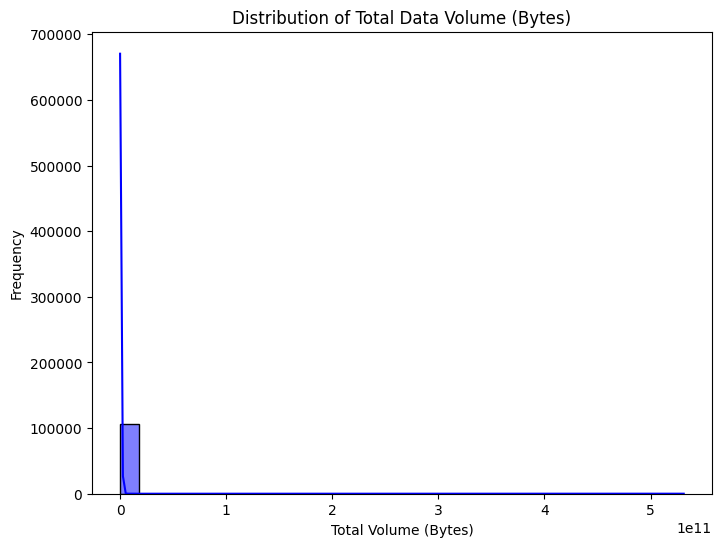

In [56]:
# Plot histograms for total data volume
plt.figure(figsize=(8, 6))
sns.histplot(user_behavior['Total Volume (Bytes)'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Data Volume (Bytes)')
plt.xlabel('Total Volume (Bytes)')
plt.ylabel('Frequency')
plt.show()

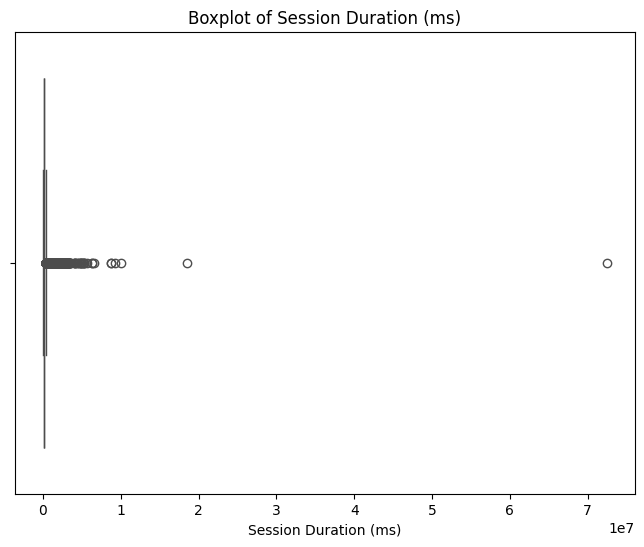

In [57]:
# Boxplot for session duration
plt.figure(figsize=(8, 6))
sns.boxplot(x=user_behavior['Dur. (ms)'], color='orange')
plt.title('Boxplot of Session Duration (ms)')
plt.xlabel('Session Duration (ms)')
plt.show()

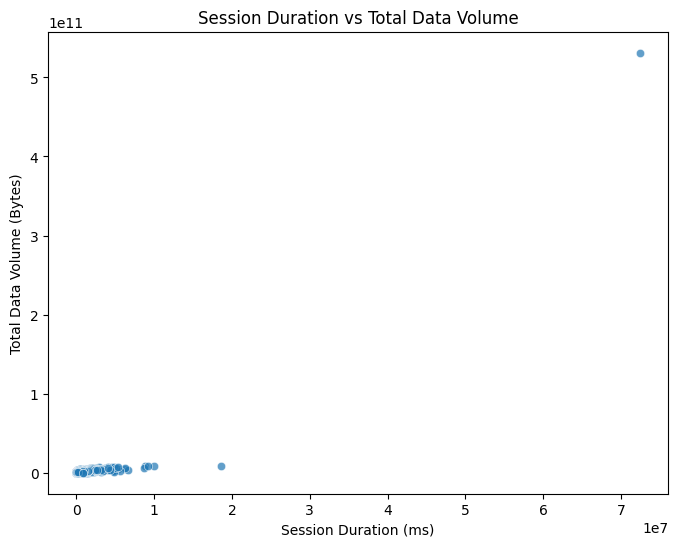

In [58]:
# Relationship between total data volume and session duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x=user_behavior['Dur. (ms)'], y=user_behavior['Total Volume (Bytes)'], alpha=0.7)
plt.title('Session Duration vs Total Data Volume')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Total Data Volume (Bytes)')
plt.show()

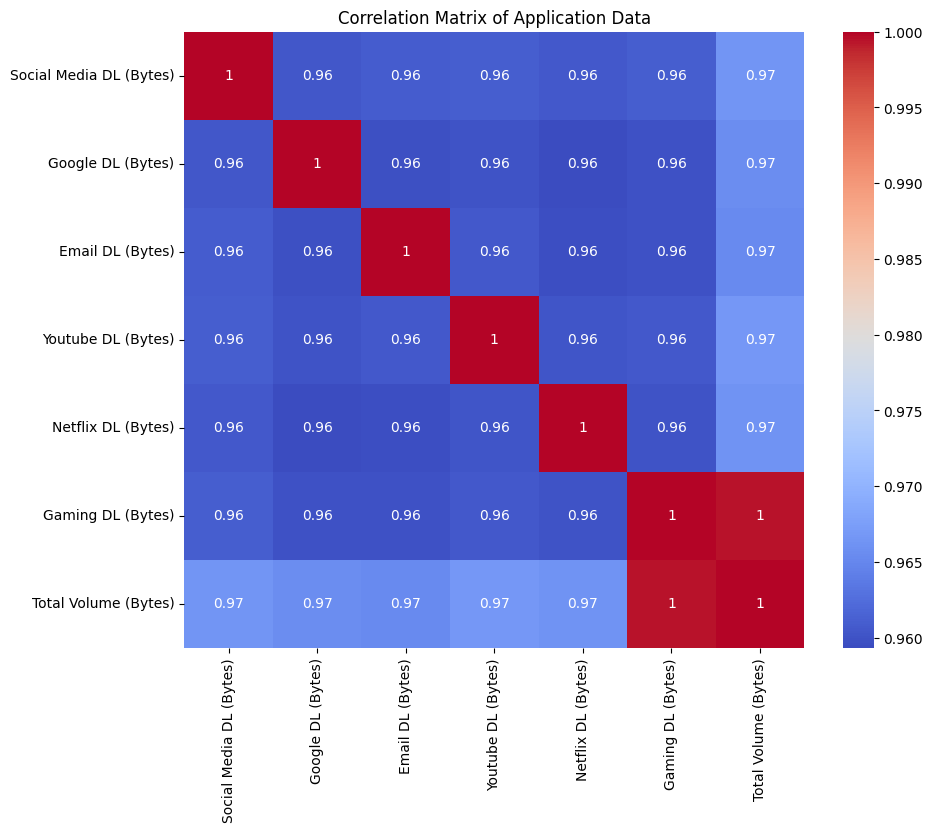

In [59]:
# Correlation matrix for application data
app_data_cols = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
    'Total Volume (Bytes)'
]
correlation_matrix = user_behavior[app_data_cols].corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Application Data')
plt.show()

Explained Variance Ratio: [0.96872203 0.00853629]


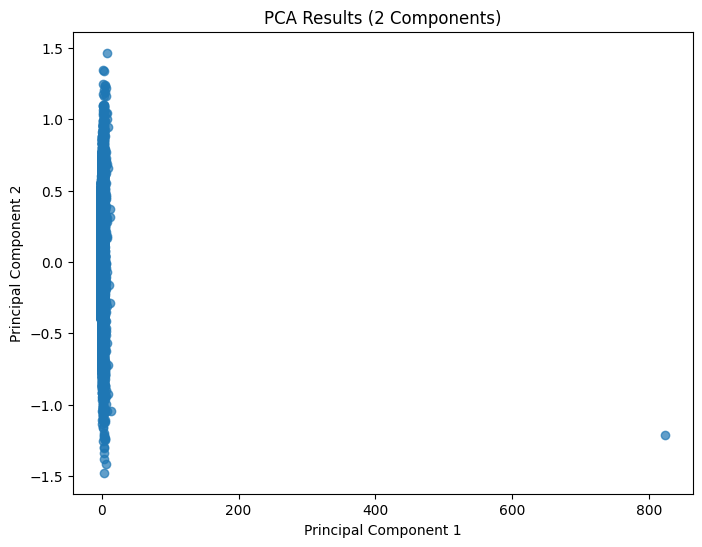

In [60]:
# Select relevant features for PCA
pca_features = user_behavior[app_data_cols].dropna()

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_features)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance)

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.7)
plt.title('PCA Results (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [61]:
pca_results

array([[-0.18819339,  0.34500984],
       [-0.55202218, -0.20540865],
       [-0.22967446,  0.05744795],
       ...,
       [-0.54008066, -0.13214682],
       [-0.19428373,  0.01459446],
       [-0.29937748, -0.41087893]], shape=(106857, 2))